In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from pymatgen.util.plotting_utils import get_publication_quality_plot
from pyqe.qe_output import *

mpl.rcParams['axes.linewidth']=3
mpl.rcParams['lines.markeredgewidth']=3
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.markersize']=5
mpl.rcParams['xtick.major.width']=3
mpl.rcParams['xtick.major.size']=0
mpl.rcParams['xtick.minor.width']=3
mpl.rcParams['xtick.minor.size']=4
mpl.rcParams['ytick.major.width']=3
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.minor.width']=3
mpl.rcParams['ytick.minor.size']=4

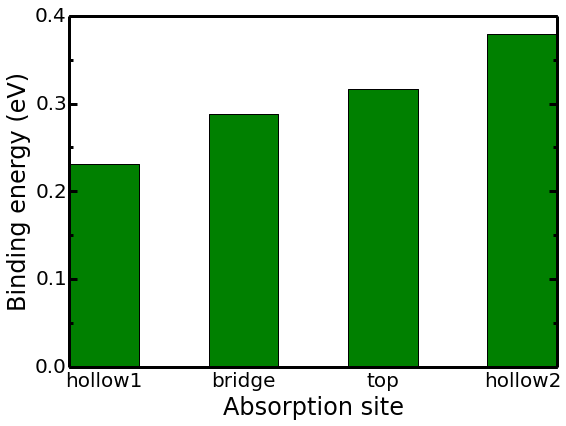

In [2]:
b_H = BasicAnalyzer('H2.csv')
e_H = b_H['energy'][0]
b_slab = BasicAnalyzer('Al_111.csv')
e_slab = b_slab['energy'][0]*4
b_slabH = BasicAnalyzer('slabH.csv','energy')
df = b_slabH.df
sites = [f.split('_')[-1] for f in df.filename]
df['site'] = sites
df['e_bind'] = df.energy - e_slab - 0.5*e_H
df['e_bind'] = df['e_bind'] / 1000
plt = get_publication_quality_plot(8,6)
index = np.arange(len(df))
plt.bar(index, df.e_bind, 0.5, color='g')
majorLocator = MultipleLocator(0.1)
minorLocator = MultipleLocator(0.05)
ax = plt.gca()
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
plt.ylabel('Binding energy (eV)')
plt.xticks(index+0.25, df['site'].values)
plt.xlabel('Absorption site')
plt.tight_layout()
plt.savefig('e_bind.pdf')